# Introduction

Let's look at the 2024 hotel sales data. We'll explore how many rooms were full, what customers did, and how prices changed. We might even joke a bit about busy hotel lobbies and sudden cancellations by using Customer Segmentation Using K-Means Clustering on Transactional Data

In [1]:
# Suppress warnings for a clean notebook output
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd

# **data upload and overview** 

In [2]:
# Read the Excel file 
data_path = '/kaggle/input/hotel-sales-2024/transactions.xlsx'
df = pd.read_excel(data_path)

# Display DataFrame
print('Data shape:', df.shape)
print('Data types:')
print(df.dtypes)

# Display the first few rows 
df.head()

Data shape: (6050, 37)
Data types:
hotel_name                 object
reg                        object
state                      object
types                      object
cus_name                   object
phone_no                   object
emel                       object
customer_rating             int64
membership                 object
rep_guest                   int64
prev_cancel                 int64
payment_method             object
card_no                    object
resv_status                object
meal                       object
assgn_room                 object
cus_seg                    object
room-type                  object
adult                       int64
(child)                     int64
dis_channel                object
price                       int64
nights                      int64
package_                    int64
gross                       int64
disc                      float64
disc_amt                  float64
sales                     float64
dep          

,hotel_name,reg,state,types,cus_name,phone_no,emel,customer_rating,membership,rep_guest,...,sales,dep,d_s,arrival_date,depature_date,ADR,Sales Person,pos,comm_pay,customer_review
0,"Lexis Suites, Penang",North,Penang,City Hotel,Ernest Barnes,669-792-1661,Ernest.Barnes31@outlook.com,5,Platinum,0,...,4280.0,300,Refunded,2024-04-02,2024-04-10,0.0,Leo,Sales Manager,15,Excellent
1,"Lexis Suites, Penang",North,Penang,City Hotel,Andrea Baker,858-637-6955,Andrea_Baker94@aol.com,4,Gold,0,...,3945.0,300,Refunded,2024-07-13,2024-07-19,0.0,Kelly,Sales Executive,20,Very Good
2,"Lexis Suites, Penang",North,Penang,City Hotel,Rebecca Parker,652-885-2745,Rebecca_Parker@comcast.net,5,Platinum,0,...,6695.0,300,Refunded,2024-08-22,2024-09-04,75.0,Bernice,Sales Executive,15,Excellent
3,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Laura Murray,364-656-8427,Laura_M@gmail.com,4,Platinum,0,...,10200.0,300,Refunded,2024-05-16,2024-05-22,75.0,Leo,Sales Manager,30,Very Good
4,"The Hilton, Kuala Lumpur",Central,Kuala Lumpur,City Hotel,Linda Hines,713-226-5883,LHines@verizon.com,5,Platinum,0,...,3325.0,300,Forfeited,2024-02-05,2024-02-10,98.0,Leo,Sales Manager,20,Excellent


In [3]:
# rename the column

df = df.rename(columns={'reg':'region','cus_name':'customer_name','emel':'email','resv_status':'status'})
df.head()

,hotel_name,region,state,types,customer_name,phone_no,email,customer_rating,membership,rep_guest,...,sales,dep,d_s,arrival_date,depature_date,ADR,Sales Person,pos,comm_pay,customer_review
0,"Lexis Suites, Penang",North,Penang,City Hotel,Ernest Barnes,669-792-1661,Ernest.Barnes31@outlook.com,5,Platinum,0,...,4280.0,300,Refunded,2024-04-02,2024-04-10,0.0,Leo,Sales Manager,15,Excellent
1,"Lexis Suites, Penang",North,Penang,City Hotel,Andrea Baker,858-637-6955,Andrea_Baker94@aol.com,4,Gold,0,...,3945.0,300,Refunded,2024-07-13,2024-07-19,0.0,Kelly,Sales Executive,20,Very Good
2,"Lexis Suites, Penang",North,Penang,City Hotel,Rebecca Parker,652-885-2745,Rebecca_Parker@comcast.net,5,Platinum,0,...,6695.0,300,Refunded,2024-08-22,2024-09-04,75.0,Bernice,Sales Executive,15,Excellent
3,"Le Méridien, Sabah",East,Sabah,Resort Hotel,Laura Murray,364-656-8427,Laura_M@gmail.com,4,Platinum,0,...,10200.0,300,Refunded,2024-05-16,2024-05-22,75.0,Leo,Sales Manager,30,Very Good
4,"The Hilton, Kuala Lumpur",Central,Kuala Lumpur,City Hotel,Linda Hines,713-226-5883,LHines@verizon.com,5,Platinum,0,...,3325.0,300,Forfeited,2024-02-05,2024-02-10,98.0,Leo,Sales Manager,20,Excellent


# EDA

- Convert date columns (`arrival_date` and `depature_date`) from strings to datetime objects.
- Check for and handle missing and duplicate values if needed.
- Ensure that numeric columns are correctly assigned.

In [4]:
# Convert date columns to datetime, inferring the date type
date_columns = ['arrival_date', 'depature_date']
for col in date_columns:
    # Errors in conversion are handled to avoid crashes if the data is not in the expected format
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Check for missing values 
missing_values = df[date_columns].isnull().sum()
print('Missing values in date columns after conversion:')
print(missing_values)

# Check for duplicates
print("\nDuplicate Records:", df.duplicated().sum())

# Additional cleaning steps 
df.rename(columns={
    '(child)': 'child'
}, inplace=True)

# Print summary statistics of numeric columns 
print(df.describe())

Missing values in date columns after conversion:
arrival_date     0
depature_date    0
dtype: int64

Duplicate Records: 0
       customer_rating  rep_guest  prev_cancel        adult        child  \
count      6050.000000     6050.0       6050.0  6050.000000  6050.000000   
mean          3.691074        0.0          0.0     1.999008     0.381322   
min           2.000000        0.0          0.0     1.000000     0.000000   
25%           3.000000        0.0          0.0     1.000000     0.000000   
50%           4.000000        0.0          0.0     2.000000     0.000000   
75%           5.000000        0.0          0.0     3.000000     1.000000   
max           5.000000        0.0          0.0     4.000000     4.000000   
std           1.128364        0.0          0.0     0.824689     0.707900   

             price       nights     package_         gross         disc  \
count  6050.000000  6050.000000  6050.000000   6050.000000  6050.000000   
mean    928.239669     8.540496   406.79669

In [5]:
# Example categorical variables
print("\nReservation Status Counts:")
print(df['status'].value_counts())

print("\nRoom Type Counts:")
print(df['room-type'].value_counts())

print("\nPayment Methods:")
print(df['payment_method'].value_counts())



Reservation Status Counts:
status
Check-Out    6050
Name: count, dtype: int64

Room Type Counts:
room-type
Deluxe Room     2361
Single Room     1860
Studio          1560
Royal Suite      269
Name: count, dtype: int64

Payment Methods:
payment_method
Credit Card        2200
Cash               1933
Online Transfer    1917
Name: count, dtype: int64


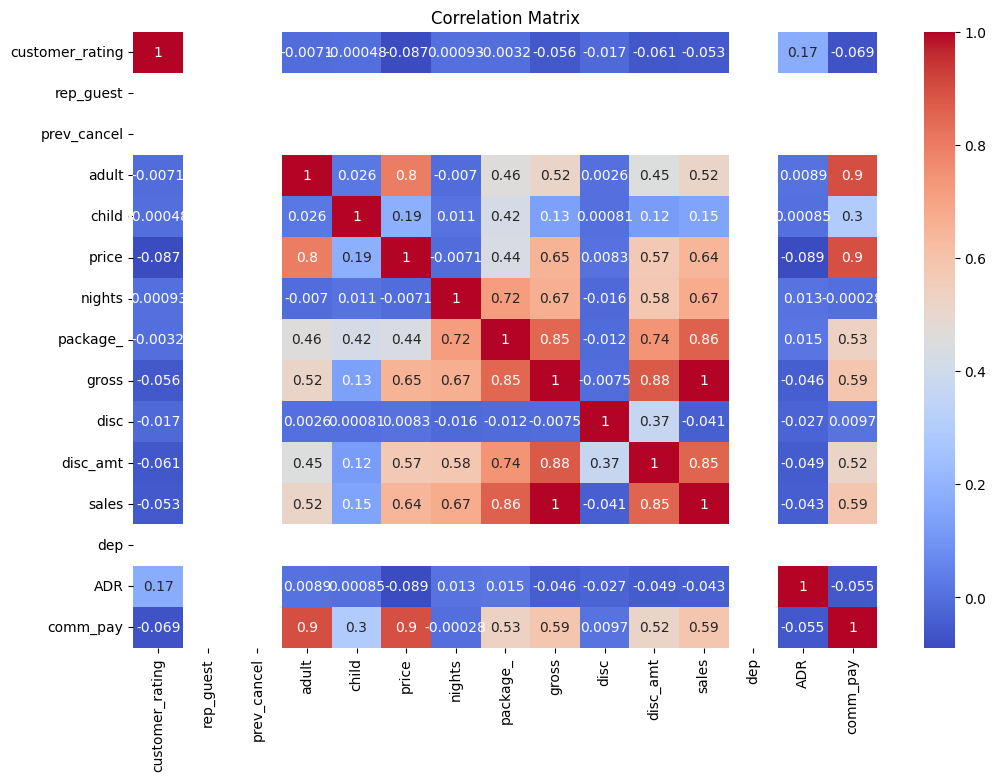

In [ ]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# **Normalize scale data**

In [7]:
# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns
df_num = df[numerical_cols]

print('Select numerical columns:')
print(df_num)


Select numerical columns:
      customer_rating  rep_guest  prev_cancel  adult  child  price  nights  \
0                   5          0            0      2      0    550       8   
1                   4          0            0      2      0    650       6   
2                   5          0            0      1      0    550      13   
3                   4          0            0      3      1   1800       6   
4                   5          0            0      2      2    650       5   
...               ...        ...          ...    ...    ...    ...     ...   
6045                4          0            0      1      0    550      12   
6046                2          0            0      3      0   1650      10   
6047                2          0            0      2      1    650       1   
6048                4          0            0      1      0    550       4   
6049                3          0            0      2      0    650       9   

      package_  gross  disc  disc_amt

In [8]:
#Standardization
#Transforms data to have mean = 0 and std = 1.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_num), columns=numerical_cols)

print('Standardization (Z-score normalization):')
print(df_standardized.head())


Standardization (Z-score normalization):
   customer_rating  rep_guest  prev_cancel     adult     child     price  \
0         1.160117        0.0          0.0  0.001203 -0.538711 -0.768389   
1         0.273805        0.0          0.0  0.001203 -0.538711 -0.565240   
2         1.160117        0.0          0.0 -1.211476 -0.538711 -0.768389   
3         0.273805        0.0          0.0  1.213882  0.874034  1.770970   
4         1.160117        0.0          0.0  0.001203  2.286780 -0.565240   

     nights  package_     gross      disc  disc_amt     sales  dep       ADR  \
0 -0.117428 -0.283463 -0.550891  0.977897 -0.271143 -0.559498  0.0 -1.794371   
1 -0.551949 -0.544730 -0.629333 -0.921389 -0.725469 -0.613793  0.0 -1.794371   
2  0.968873 -0.479413 -0.119461  0.977897  0.238814 -0.168081  0.0 -0.203419   
3 -0.551949  0.239070  0.453165  0.977897  0.915667  0.400000  0.0 -0.203419   
4 -0.769209 -0.022197 -0.731308  0.977897 -0.484398 -0.714281  0.0  0.284473   

   comm_pay  
0 -1.20

In [9]:
# Min-Max Normalization
# Scales data to a range of 0 to 1.

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df_num), columns=numerical_cols)

print('Min-Max Normalization:')
print(df_normalized.head())


Min-Max Normalization:
   customer_rating  rep_guest  prev_cancel     adult  child  price    nights  \
0         1.000000        0.0          0.0  0.333333   0.00   0.00  0.466667   
1         0.666667        0.0          0.0  0.333333   0.00   0.08  0.333333   
2         1.000000        0.0          0.0  0.000000   0.00   0.00  0.800000   
3         0.666667        0.0          0.0  0.666667   0.25   1.00  0.333333   
4         1.000000        0.0          0.0  0.333333   0.50   0.08  0.266667   

   package_     gross  disc  disc_amt     sales  dep       ADR  comm_pay  
0  0.145631  0.136283   1.0  0.152778  0.132361  0.0  0.000000  0.000000  
1  0.106796  0.118584   0.5  0.067708  0.120584  0.0  0.000000  0.333333  
2  0.116505  0.233628   1.0  0.248264  0.217261  0.0  0.225904  0.000000  
3  0.223301  0.362832   1.0  0.375000  0.340482  0.0  0.225904  1.000000  
4  0.184466  0.095575   1.0  0.112847  0.098787  0.0  0.295181  0.333333  


# **Apply K-Means clustering(using k=3)**

In [10]:
# prepare scale data

from sklearn.preprocessing import StandardScaler

# Select numeric columns and scale them
numerical_cols = df.select_dtypes(include='number').columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])


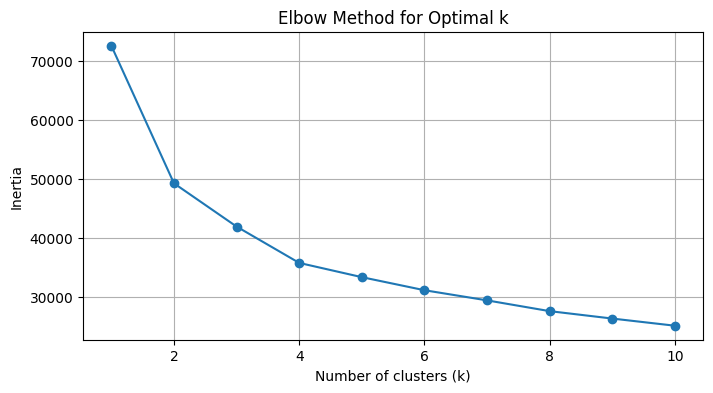

In [11]:
# Find Optimal Number of Clusters (Elbow Method)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose the "elbow" point where the decrease in inertia slows down.


In [12]:
# Apply K-Means with Chosen k(clustering)
# Assuming k = 3 

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# analyze the cluster
# Cluster sizes
print(df['cluster'].value_counts())

# Compare cluster means
print(df.groupby('cluster')[numerical_cols].mean())


cluster
1    4212
0     947
2     891
Name: count, dtype: int64
         customer_rating  rep_guest  prev_cancel     adult     child  \
cluster                                                                
0               3.549102        0.0          0.0  2.932418  0.644139   
1               3.756885        0.0          0.0  1.585708  0.310541   
2               3.530864        0.0          0.0  2.960718  0.436588   

               price     nights    package_         gross      disc  \
cluster                                                               
0        1666.473073  12.372756  879.260824  20567.793031  0.075713   
1         605.840456   8.551045  324.230769   5183.986230  0.074086   
2        1667.676768   4.417508  294.949495   7353.198653  0.073513   

            disc_amt         sales    dep        ADR   comm_pay  
cluster                                                          
0        1547.964625  19899.089229  300.0  78.462978  25.818374  
1         382.910138 

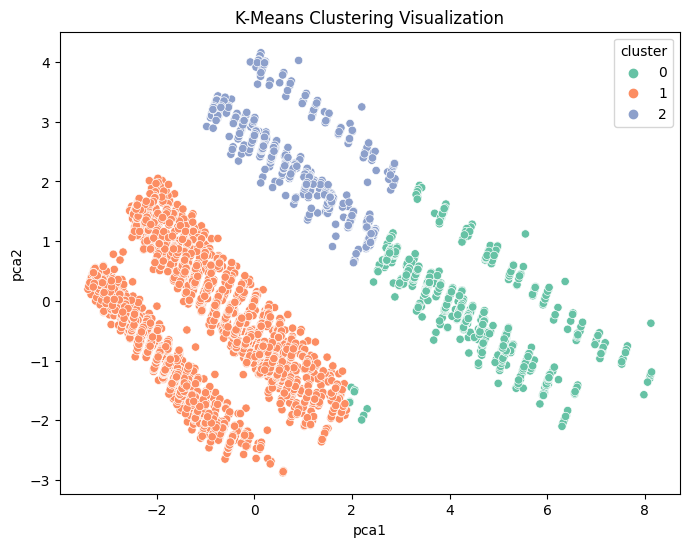

In [13]:
# visualized cluster using Elbow Method
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Plot clusters
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('K-Means Clustering Visualization')
plt.show()


# **Determine optimal clusters using Elbow Method and Silhouette Score**

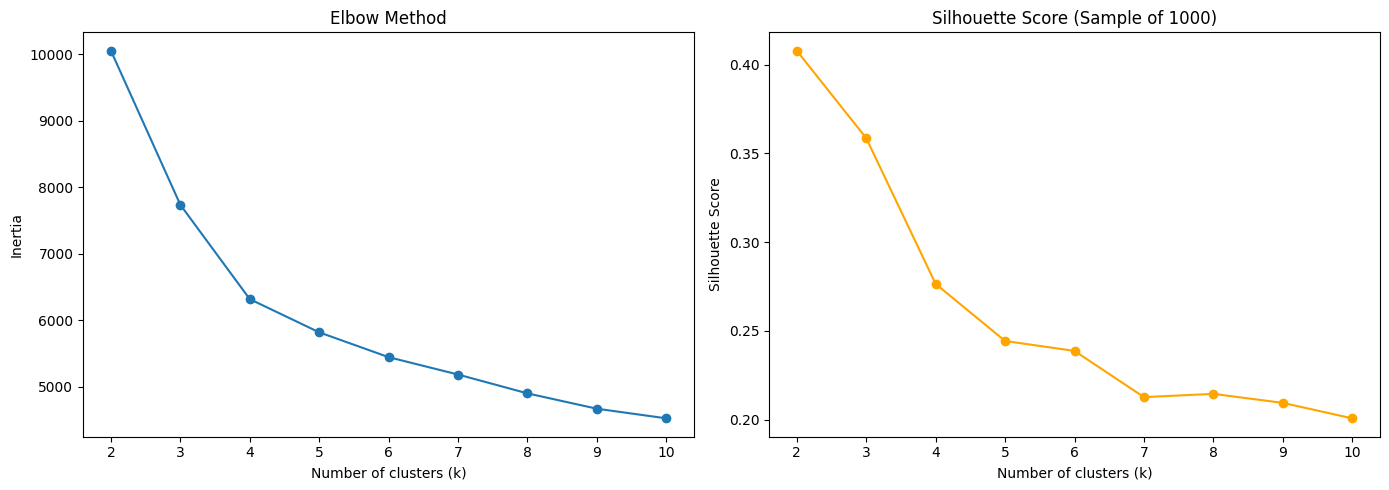

In [14]:
# clusters using Elbow Method and Silhouette Score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select numeric columns
numerical_cols = df.select_dtypes(include='number').columns
X = df[numerical_cols]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# random sample 1000 rows
np.random.seed(42)
sample_idx = np.random.choice(X_scaled.shape[0], 1000, replace=False)
X_sample = X_scaled[sample_idx]

# Elbow and Silhouette
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sample)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_sample, labels))

# Plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score (Sample of 1000)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


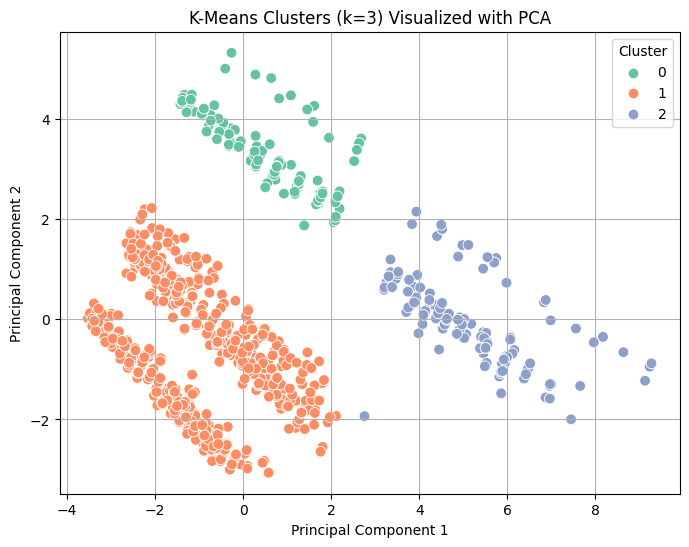

In [15]:
#PCA & K-Means Cluster Visualization
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_sample is your scaled sample (1000 rows)
# Reduce dimensions to 2 with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# Apply K-Means of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_sample)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title(f'K-Means Clusters (k={optimal_k}) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# **Additional Cluster Visualizations**

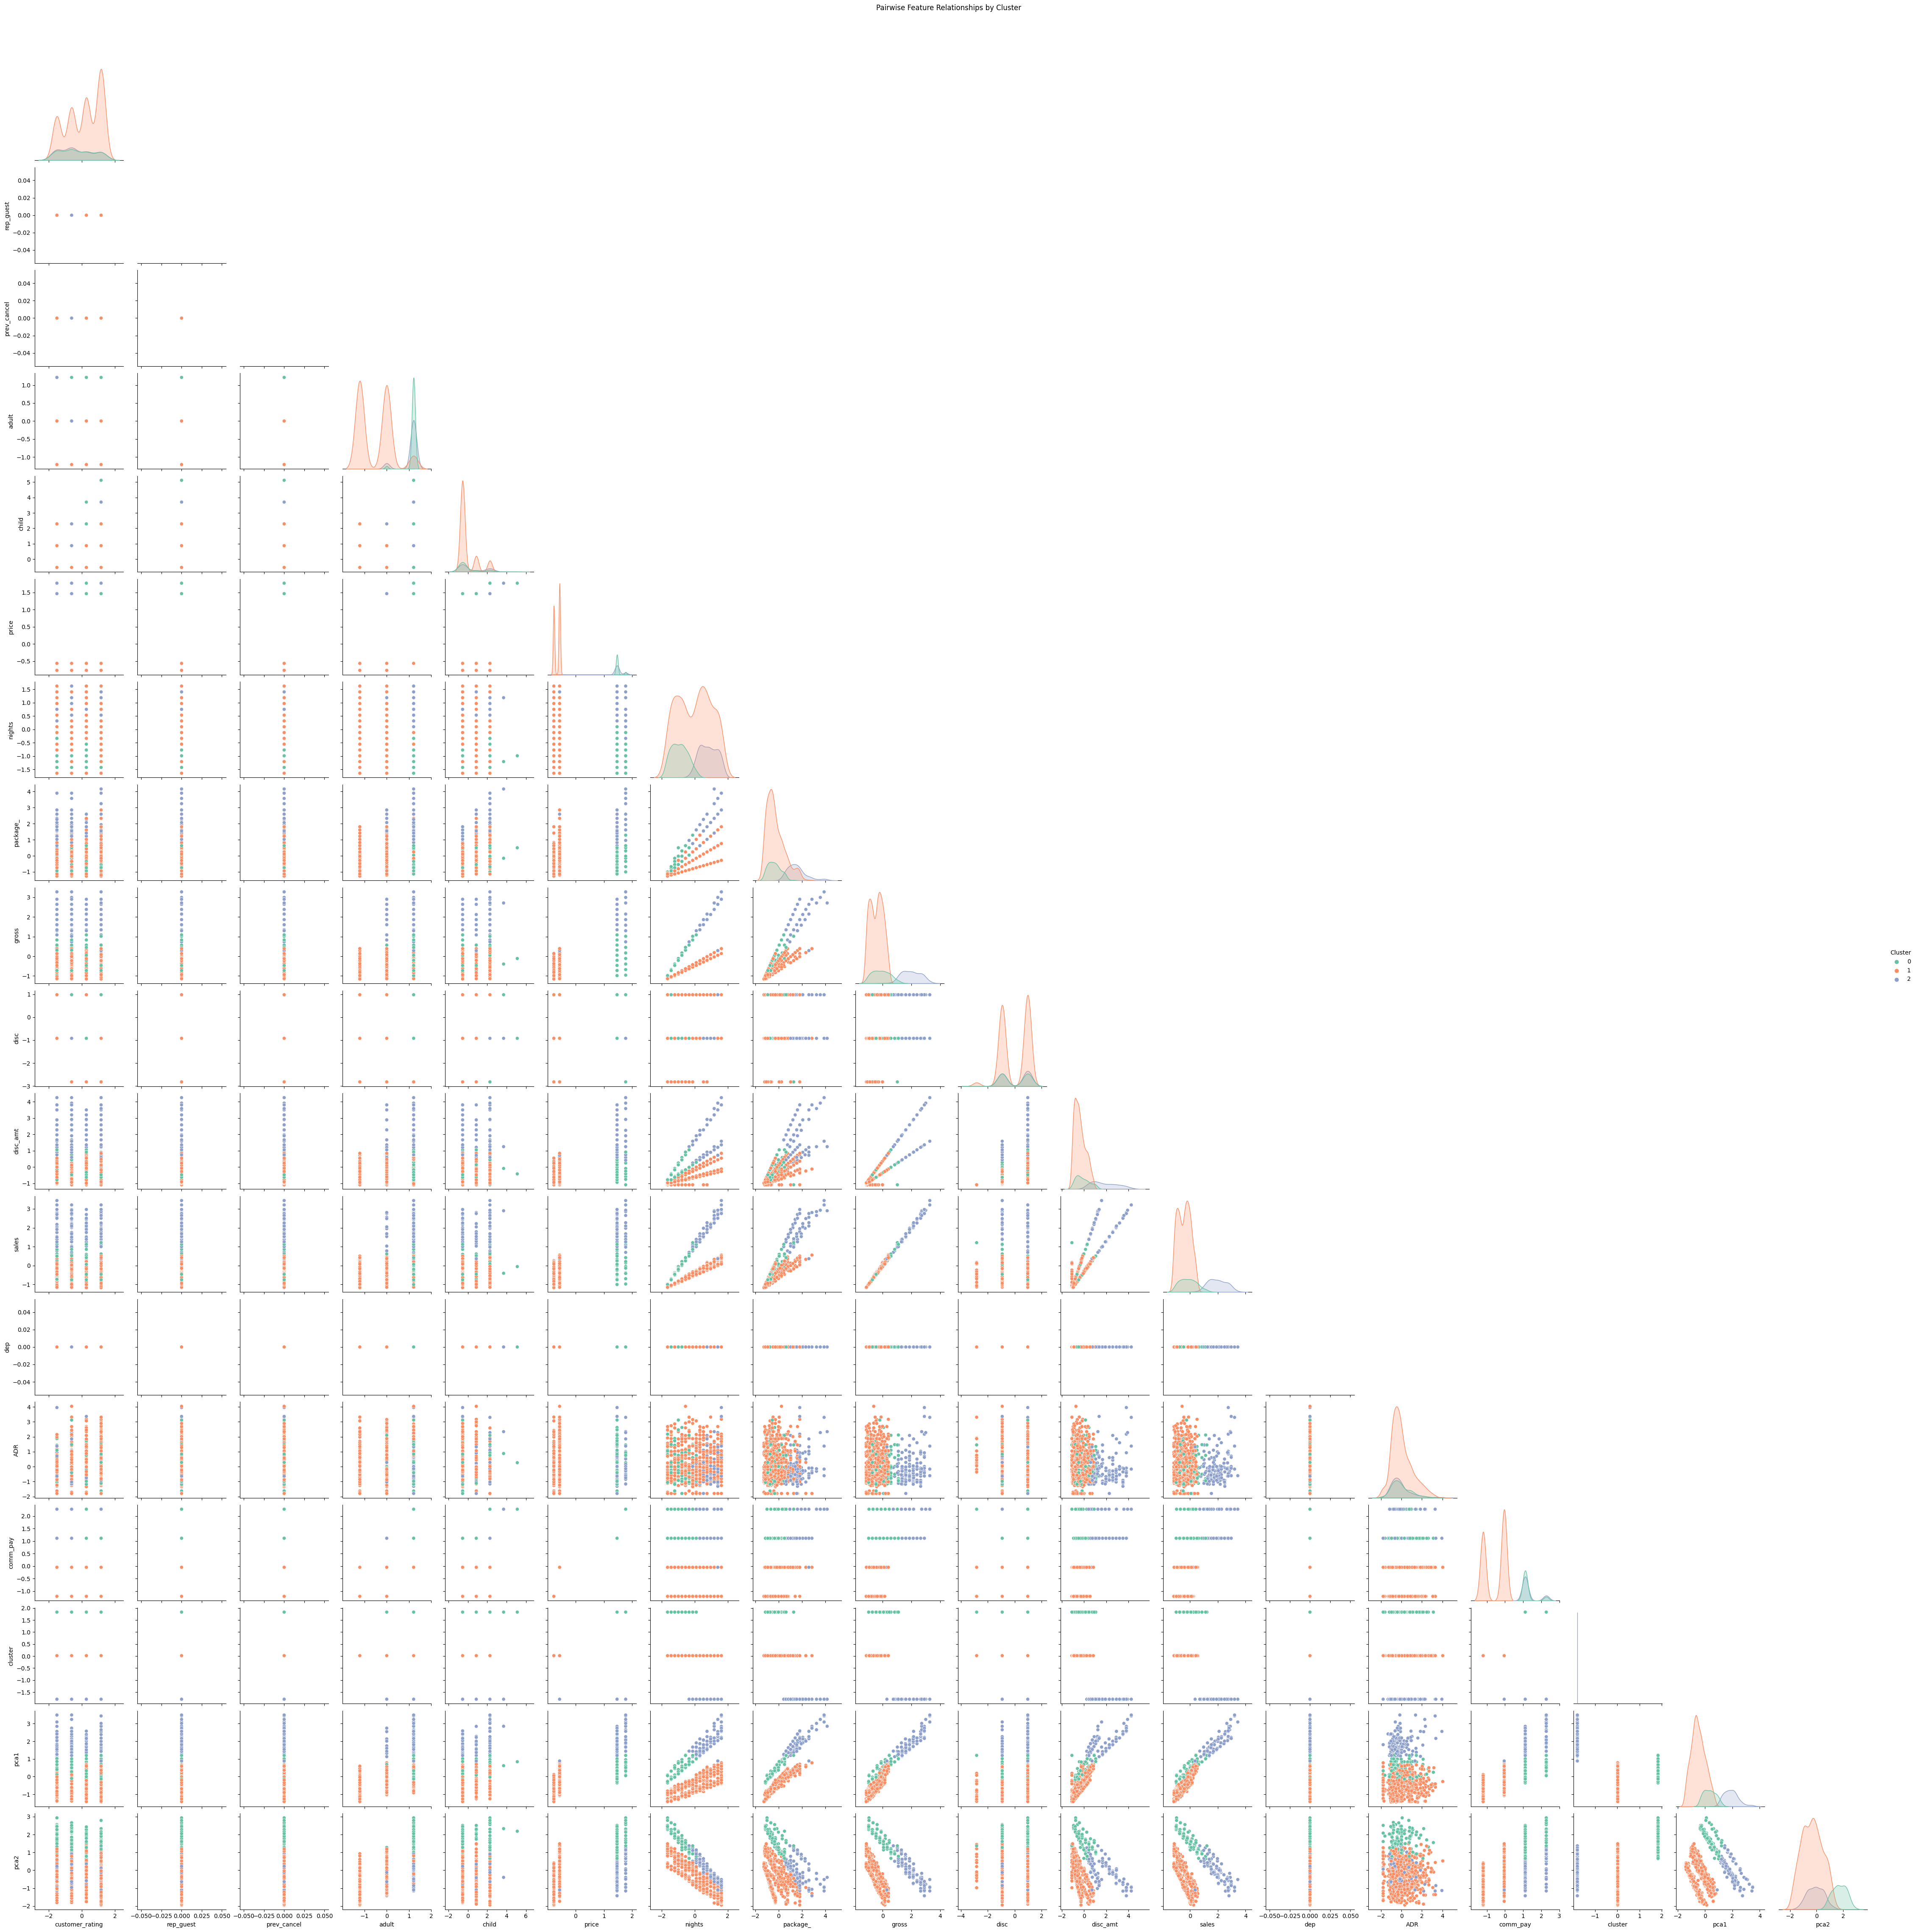

In [16]:
#Pairplot (Pairwise Feature Plots)
#Great for small numbers of numerical features.
# Create a DataFrame with cluster labels
sample_df = pd.DataFrame(X_sample, columns=numerical_cols)
sample_df['Cluster'] = labels

# Pairplot
sns.pairplot(sample_df, hue='Cluster', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Feature Relationships by Cluster', y=1.02)
plt.show()


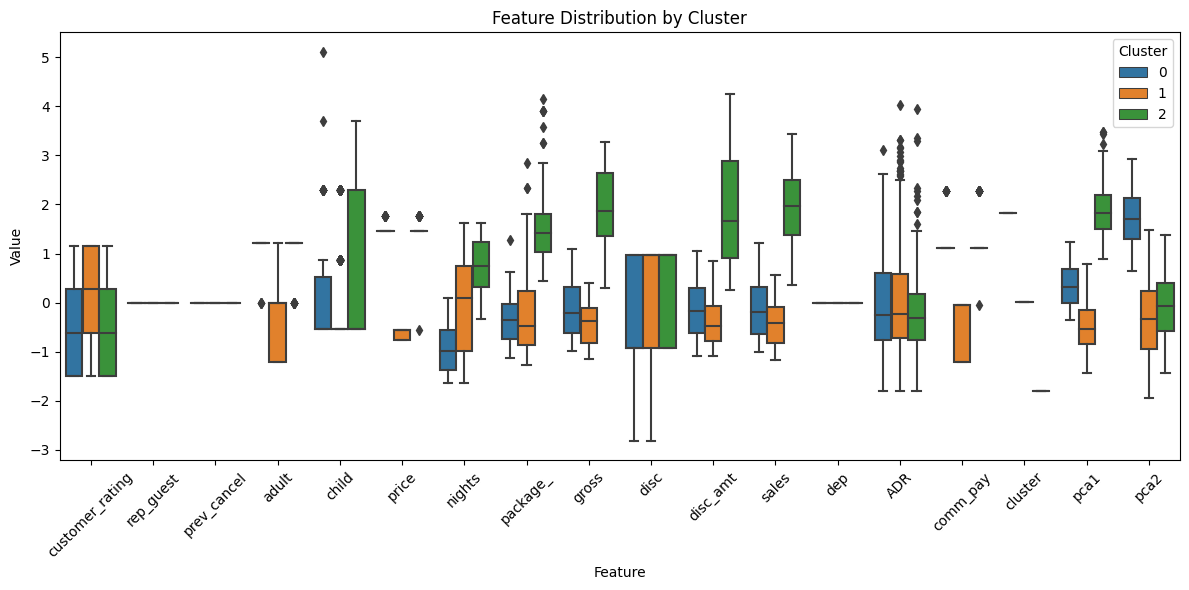

In [17]:
#Boxplots of Features by Cluster
#To compare distributions of features across clusters.

# Melt for easier boxplotting
melted_df = sample_df.melt(id_vars='Cluster', var_name='Feature', value_name='Value')

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='Feature', y='Value', hue='Cluster')
plt.xticks(rotation=45)
plt.title('Feature Distribution by Cluster')
plt.tight_layout()
plt.show()


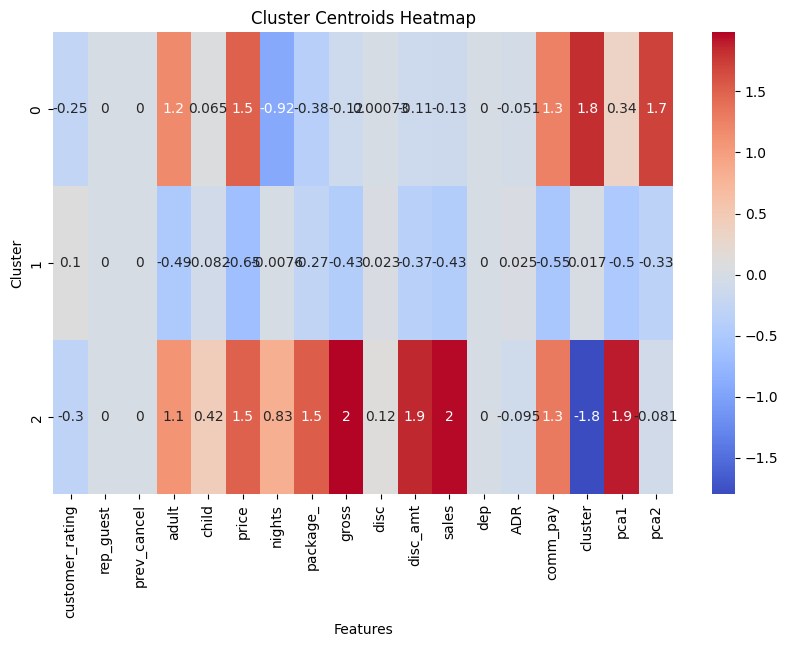

In [18]:
#Cluster Centroids Heatmap
#Displays feature averages per cluster.

# Cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_cols)

plt.figure(figsize=(10, 6))
sns.heatmap(centroids, annot=True, cmap='coolwarm')
plt.title('Cluster Centroids Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()


Summary / Abstract :

This project applies K-Means Clustering to segment customers using their transactional data. After cleaning, scaling, and analyzing the dataset, customers were grouped based on their behavior across several features such as purchase amounts and frequency.

The resulting clusters highlight meaningful patterns in customer behavior. These behavioral patterns form the basis of customer segmentation, enabling businesses to design more targeted marketing strategies, enhance customer engagement, and optimize services.